## Kaggle Housing Prices Competition

### Exploratory Data Analysis
* Understand the data structure
* Discover and visualize the data to gain insights
    * Explore numerical attributes
    * Look for correlations among numerical attributes
    * Explore categorical attributes

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load data 
housing = pd.read_csv('housing_price_data/train.csv')
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# View all features
housing.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
# Get shape of data
housing.shape

(1460, 81)

In [6]:
# Get column data types and number of non-null values
housing = housing.drop('Id', axis = 1)
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [7]:
# View numerical features
housing.select_dtypes(exclude = ['object']).columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [8]:
# View data summary of numerical features
housing.select_dtypes(exclude = ['object']).describe().round(decimals = 2).transpose()

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.90,42.30,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.05,24.28,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.83,9981.26,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.10,1.38,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.58,1.11,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.27,30.20,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.87,20.65,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.69,181.07,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.64,456.10,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.55,161.32,0.0,0.00,0.0,0.00,1474.0


In [9]:
# View categorical features
housing.select_dtypes(include = ['object']).columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [10]:
# View data summary of categorical features
housing.select_dtypes(include = ['object']).describe().transpose()

,count,unique,top,freq
MSZoning,1460,5,RL,1151
Street,1460,2,Pave,1454
Alley,91,2,Grvl,50
LotShape,1460,4,Reg,925
LandContour,1460,4,Lvl,1311
Utilities,1460,2,AllPub,1459
LotConfig,1460,5,Inside,1052
LandSlope,1460,3,Gtl,1382
Neighborhood,1460,25,NAmes,225
Condition1,1460,9,Norm,1260


In [11]:
# View statistics summary of target variable, SalePrice
housing['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Text(0.5, 1.0, 'Distribution of SalePrice')

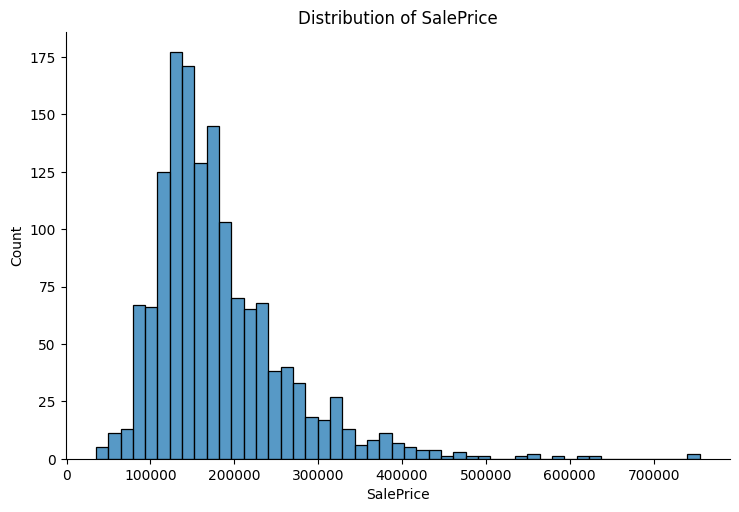

In [12]:
# Plot distribution of SalePrice
sns.displot(housing['SalePrice'], aspect = 1.5)
plt.title('Distribution of SalePrice')

Given the distribution plot and the statistical summary of the SalePrice (mean = 181,000 and median = 163,000), we can see that the SalePrice is skewed to the right. By applying a log transformation, we can improve the fit and make the variable more normally distributed. 

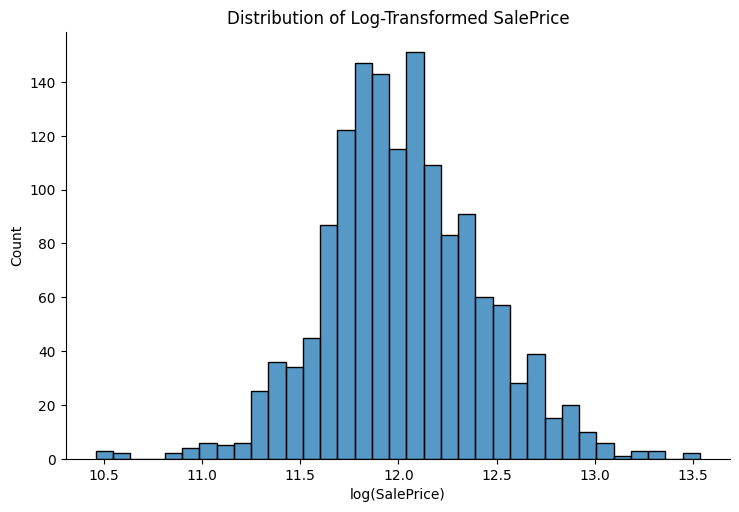

In [13]:
# Apply log transformation to make distribution normal
sns.displot(np.log(housing['SalePrice']), aspect = 1.5)
plt.title('Distribution of Log-Transformed SalePrice')
plt.xlabel('log(SalePrice)')
plt.show()

### Explore Numerical Features

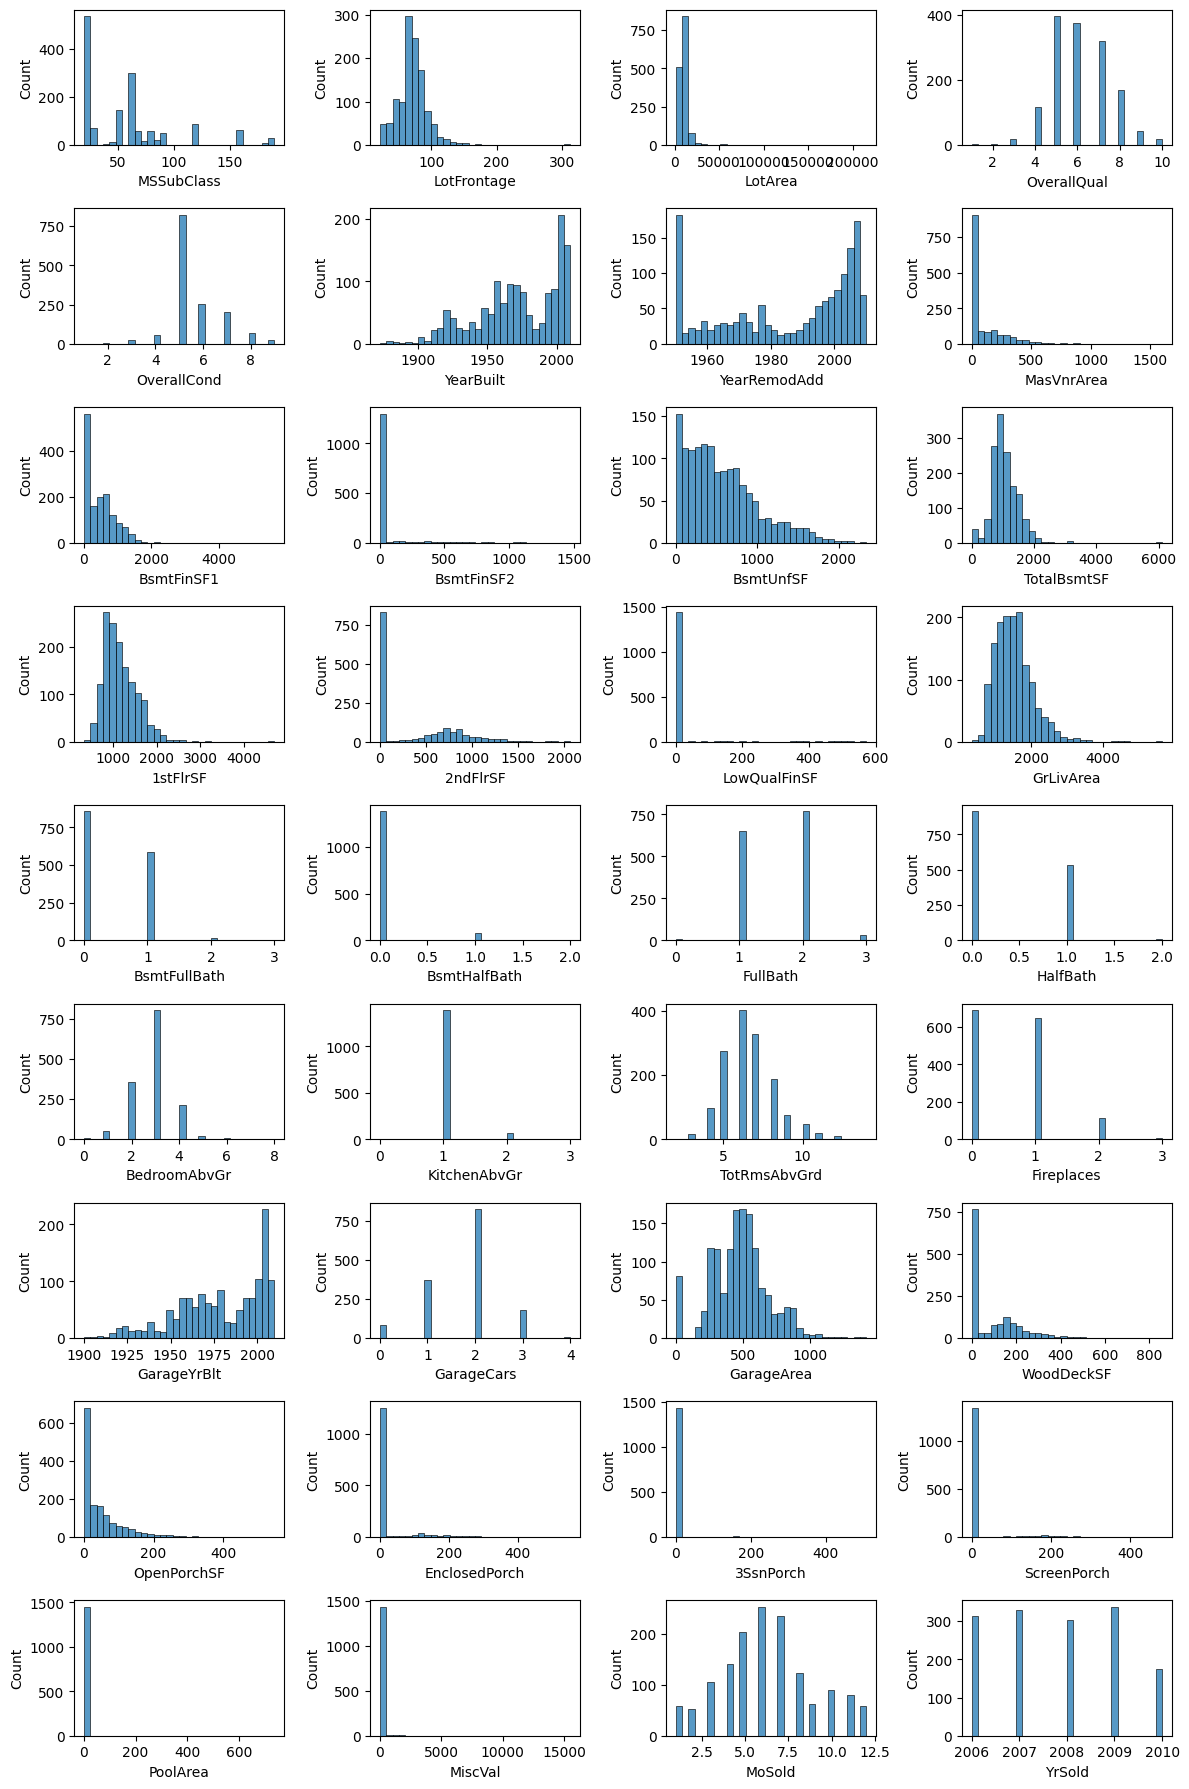

In [14]:
# Extract numerical features
num_features = housing.select_dtypes(exclude='object').drop(['SalePrice'], axis=1).copy()

# Distribution plots of all numerical features
fig = plt.figure(figsize=(12, 18))

for i in range(len(num_features.columns)):
    ax = fig.add_subplot(9, 4, i + 1)
    sns.histplot(num_features.iloc[:, i].dropna(), ax = ax, bins = 30)  
    plt.xlabel(num_features.columns[i])

plt.tight_layout()
plt.show()

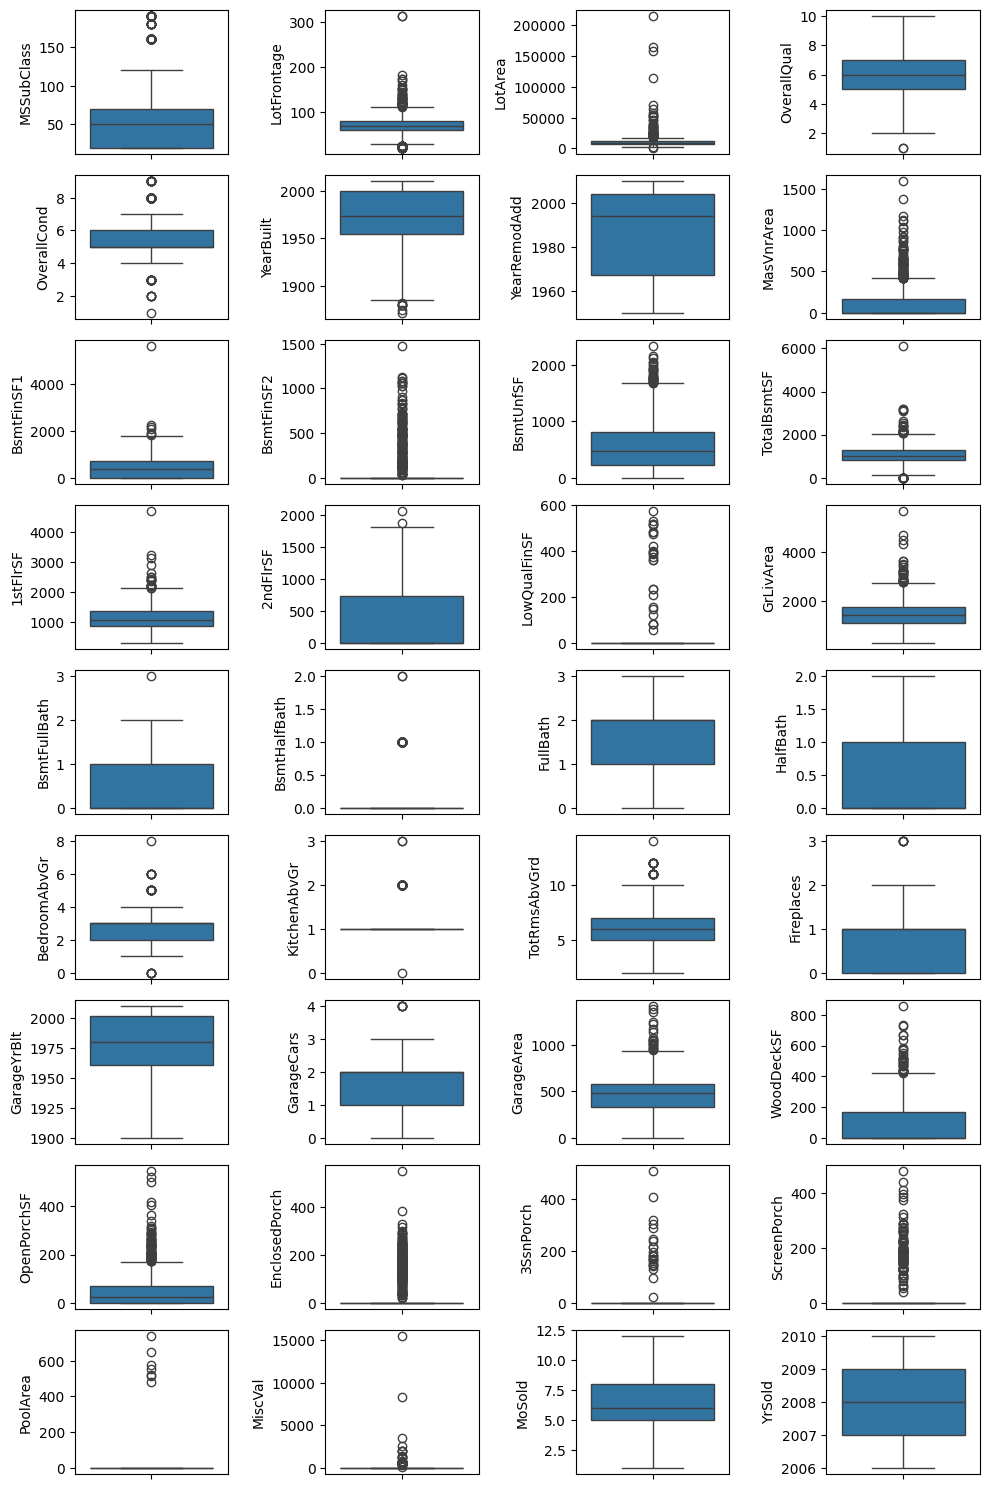

In [15]:
# Plot boxplot to view outliers for all numerical features - outliers will be resolved in data cleaning process
fig = plt.figure(figsize = (10, 15))

for i in range(len(num_features.columns)):
    fig.add_subplot(9, 4, i+1)
    sns.boxplot(y = num_features.iloc[:, i])

plt.tight_layout()
plt.show()

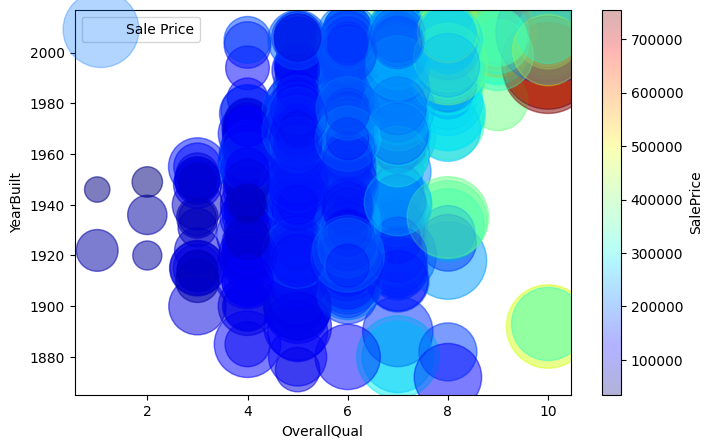

In [20]:
# Additional plots for exploring data
scatter = housing.plot(kind = 'scatter', x = 'OverallQual', y = 'YearBuilt', s = housing['GrLivArea'], alpha = 0.3,
                       figsize = (8, 5), c = 'SalePrice', cmap = plt.get_cmap('jet'), colorbar = True)

# Adding a label to the scatter points
plt.scatter(housing['OverallQual'], housing['YearBuilt'], s = housing['GrLivArea'], c = housing['SalePrice'], 
            cmap = 'jet', alpha = 0.3, label = 'Sale Price')

# Displaying the legend
plt.legend(loc = 'best')

It is useful to know whether some pairs of attributes are correlated and by how much because it is good practice to remove highly correlated features. 

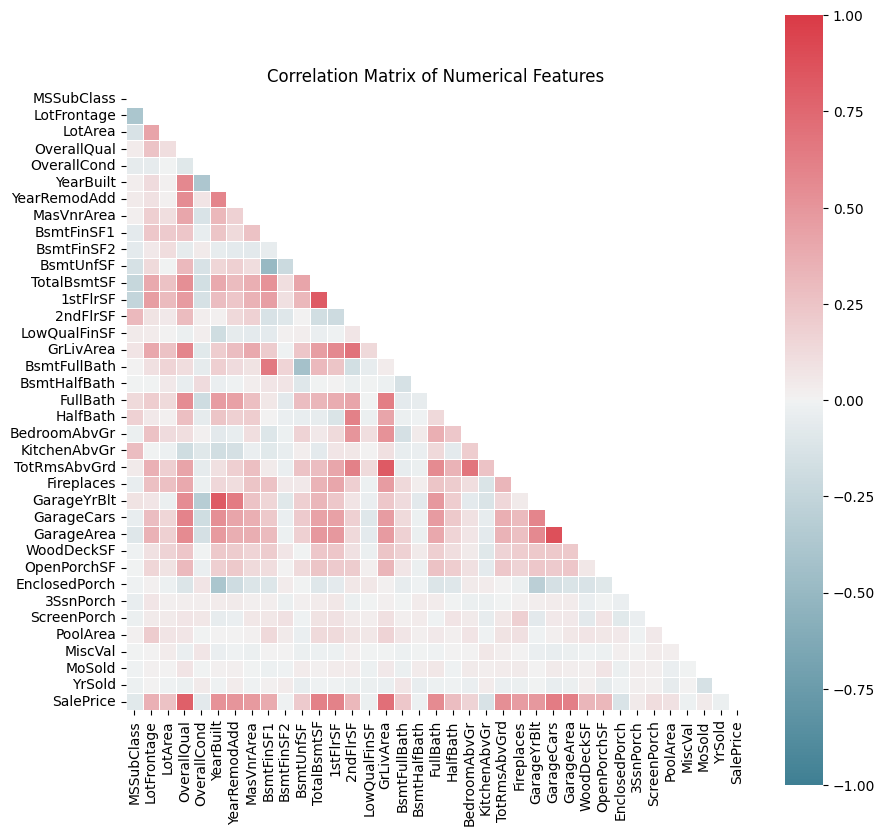

In [35]:
# Investigate correlation among numerical features
num_features = housing.select_dtypes(exclude = ['object'])

correlation = num_features.corr()

# Create the heatmap
f, ax = plt.subplots(figsize = (10, 10))
mask = np.zeros_like(correlation, dtype = bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(correlation, mask = mask, cmap = sns.diverging_palette(220, 10, as_cmap = True),
            square = True, ax = ax, vmin = -1.0, vmax = 1.0, linewidths = 0.5)

plt.title("Correlation Matrix of Numerical Features")
plt.show()

In [33]:
# Print sorted list of correlations between all features and target variable
correlation['SalePrice'].sort_values(ascending = False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

Next, we want to plot a pair-wise scatter matrix in order to view join distribution plots for each pair of variables. From the pairplots below, we can see that an an increase in 'GrLivArea' correlates to an increase in price.

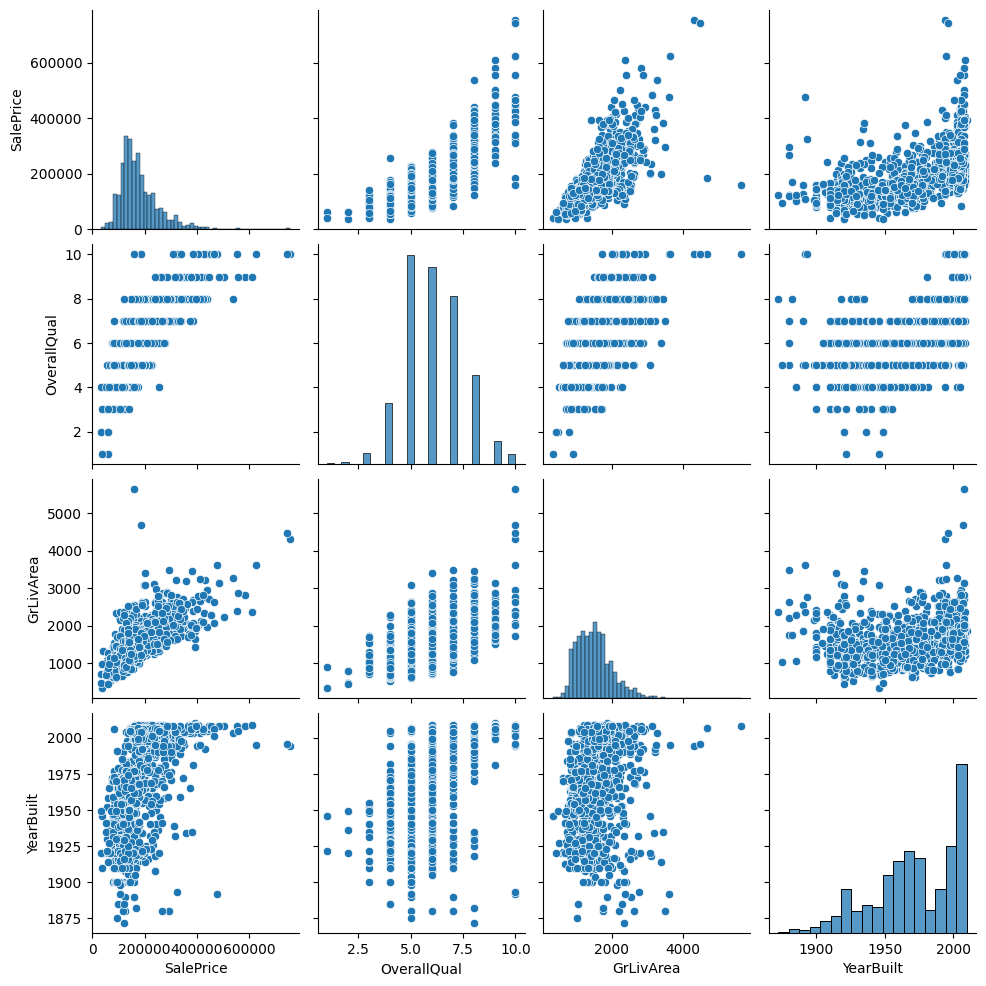

In [36]:
columns = ['SalePrice', 'OverallQual', 'GrLivArea', 'YearBuilt']
sns.pairplot(housing[columns])

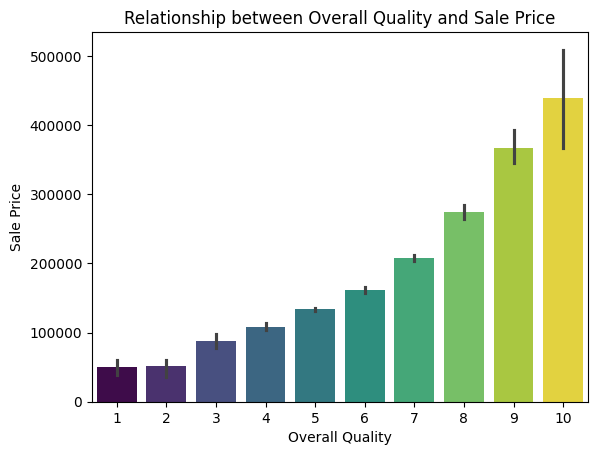

In [44]:
# Digging deeper into Overall Quality vs. SalePrice
# Additional plots for investigating relationships between the highest correlated variables
sns.barplot(x = housing.OverallQual, y = housing.SalePrice, hue = housing.OverallQual, palette = 'viridis')

plt.title('Relationship between Overall Quality and Sale Price')
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price')
plt.legend().remove()
plt.show()

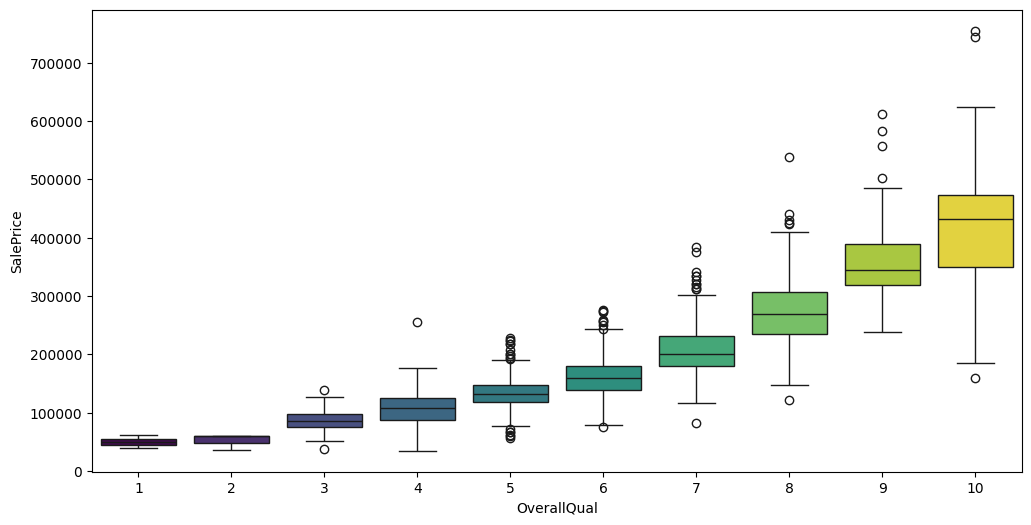

In [71]:
# Additional plots for investigating relationships between the highest correlated variables
plt.figure(figsize = (12, 6))
sns.boxplot(x = housing.OverallQual, y = housing.SalePrice, hue = housing.OverallQual, palette = 'viridis')
plt.legend().remove()

The plots above clearly show how prices change with quality - higher quality, higher price. We can also see that with higher quality also comes a much higher variability in price. 

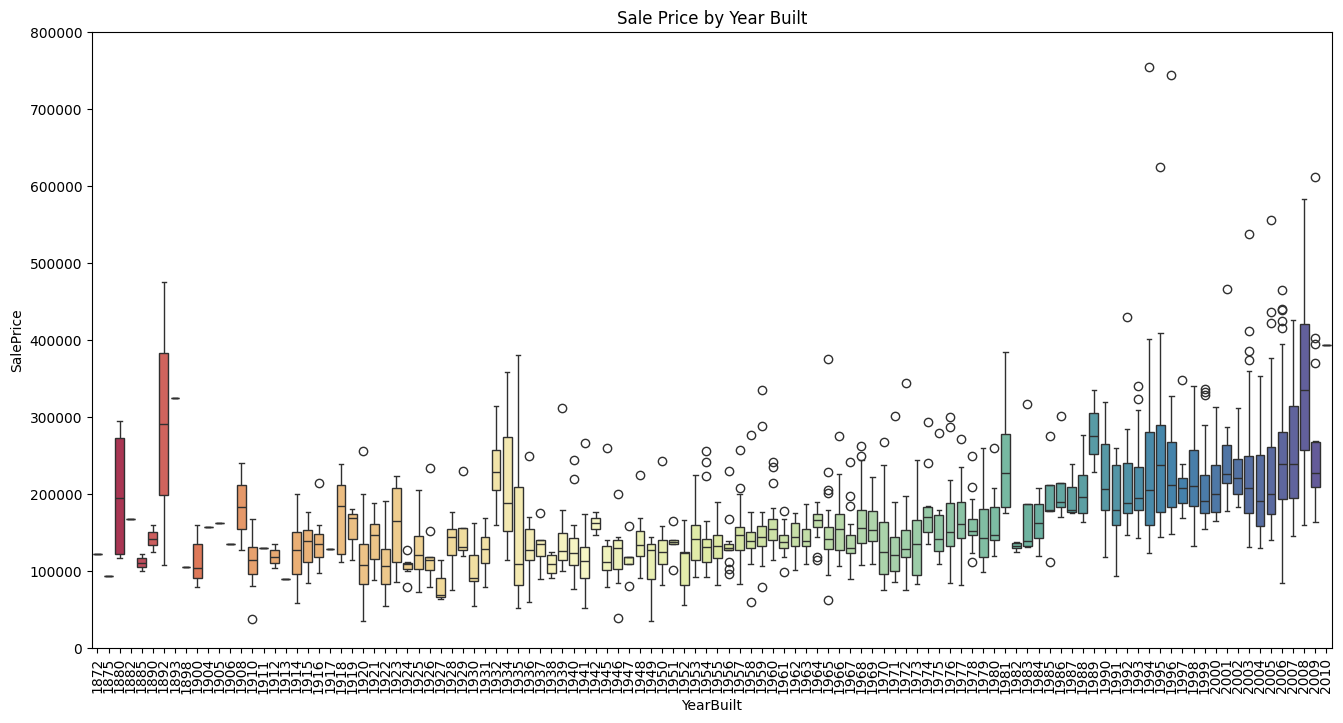

In [66]:
# Digging deeper into YearBuilt vs. SalePrice
# Additional plots for investigating relationships between the highest correlated variables
data = pd.concat([housing['SalePrice'], housing['YearBuilt']], axis = 1)
f, ax = plt.subplots(figsize = (16, 8))
fig = sns.boxplot(x = 'YearBuilt', y = 'SalePrice', data = data, hue = 'YearBuilt', palette = 'Spectral')
fig.axis(ymin = 0, ymax = 800000)
plt.xticks(rotation = 90)
plt.title("Sale Price by Year Built")
plt.legend().remove()
plt.show()

In [72]:
# Only important correlations and not auto-correlations
threshold = 0.5
important_corrs = (corr[abs(corr) > threshold][corr != 1.0]) \
    .unstack().dropna().to_dict()

unique_important_corrs = pd.DataFrame(
    list(set([(tuple(sorted(key)), important_corrs[key]) \
    for key in important_corrs])), columns=['attribute pair', 'correlation'])

# Sorted by absolute value
unique_important_corrs = unique_important_corrs.iloc[
    abs(unique_important_corrs['correlation']).argsort()[::-1]]

unique_important_corrs    

,attribute pair,correlation
26,"(GarageArea, GarageCars)",0.882475
18,"(GarageYrBlt, YearBuilt)",0.825667
9,"(GrLivArea, TotRmsAbvGrd)",0.825489
5,"(1stFlrSF, TotalBsmtSF)",0.819530
7,"(2ndFlrSF, GrLivArea)",0.687501
23,"(BedroomAbvGr, TotRmsAbvGrd)",0.676620
10,"(BsmtFinSF1, BsmtFullBath)",0.649212
0,"(GarageYrBlt, YearRemodAdd)",0.642277
8,"(FullBath, GrLivArea)",0.630012
11,"(2ndFlrSF, TotRmsAbvGrd)",0.616423


### Explore Categorical Features

In [76]:
# Extract categorical features from data
categorical_columns = housing.select_dtypes(include = 'object').columns
print(categorical_columns)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


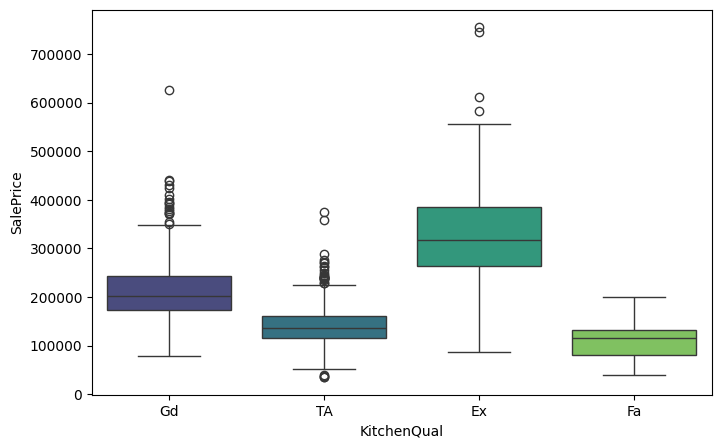

In [86]:
# Let's take a look at Kitchen Quality
f, ax = plt.subplots(figsize = (8,5))
sns.boxplot(y = housing.SalePrice, x = housing.KitchenQual, hue = housing.KitchenQual, palette = 'viridis')
plt.show()

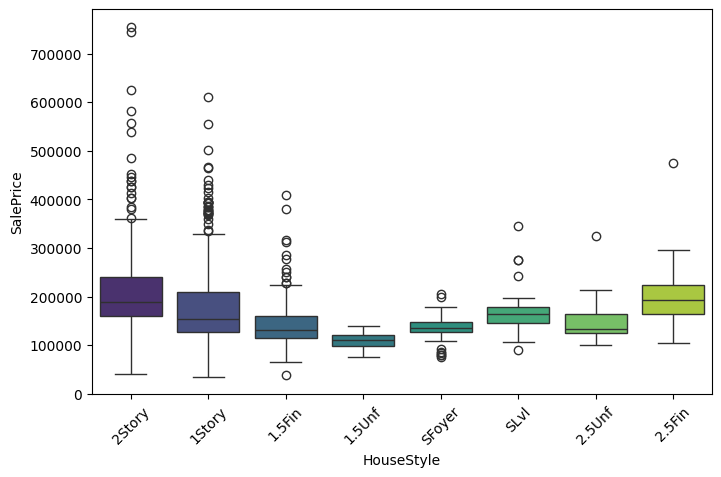

In [87]:
# What about the style of the house?
f, ax = plt.subplots(figsize = (8,5))
sns.boxplot(y = housing.SalePrice, x = housing.HouseStyle, hue = housing.HouseStyle, palette = 'viridis')
plt.xticks(rotation = 45)
plt.show()

From the plot above, we can see that 2 story houses have the highest variability in price and tend to have higher prices, while 1.5 Unf are the least expensive option.

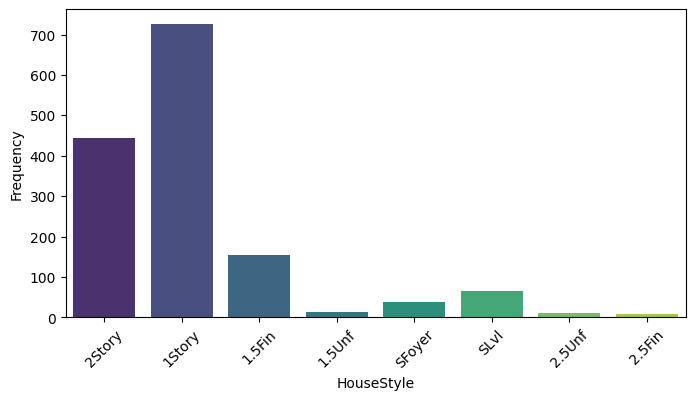

In [90]:
# Count of categories within HouseStyle attribute
fig = plt.figure(figsize=(8, 4))
sns.countplot(x = 'HouseStyle', data = housing, hue = housing.HouseStyle, palette = 'viridis' )
plt.xticks(rotation = 45)
plt.ylabel('Frequency')
plt.show()

In [91]:
housing["HouseStyle"].value_counts()

HouseStyle
1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: count, dtype: int64

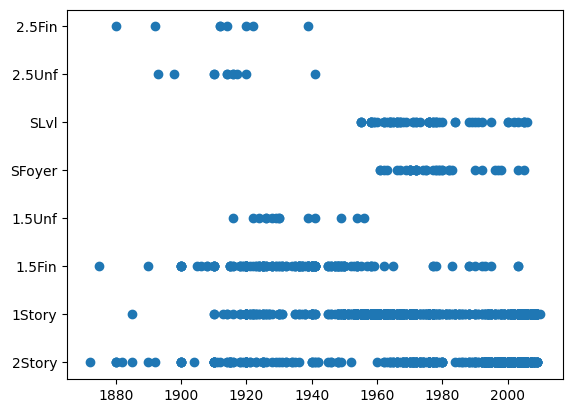

In [92]:
plt.scatter(housing['YearBuilt'],housing['HouseStyle'])

From the plots above, we can see that there are many more 1 story and 2 story houses than any other style of home. These styles of home have also been around much longer than other styles such as SLvl and SFoyer, which are less common. 